<a href="https://colab.research.google.com/github/YiQi0318/ChatGPT-STPA/blob/main/RQ2_RQ3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One-way ANOVA Results:
F-statistic: 0.6929811540127634
P-value: 0.5047297156105266
Fail to reject the null hypothesis: There is no significant difference between the groups.

Group 1 (Sample Size: 5 ): [1.         0.85714286 0.88888889 0.88888889 0.66666667]
Group 2 (Sample Size: 19 ): [1.         1.         0.85714286 1.         1.         0.92307692
 0.88888889 0.875      1.         0.9        1.         0.8
 1.         0.875      0.71428571 0.9        1.         0.81818182
 0.8       ]
Group 3 (Sample Size: 30 ): [0.85714286 0.875      0.91666667 1.         0.75       0.88888889
 1.         0.71428571 1.         0.88888889 0.88888889 1.
 1.         0.88888889 0.9        1.         0.88888889 0.8
 0.8        0.7        1.         0.9        0.77777778 0.85714286
 0.9        1.         0.8        1.         1.         0.7       ]

Group 1 (Group1_mean: 0.8603174603174603 )

Group 2 (Group2_mean: 0.9132408527145369 )

Group 3 (Group3_mean: 0.8897486772486772 )

Group (Group_mean_diff: 

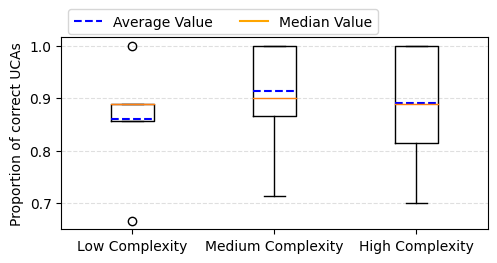

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Group1 Group2   0.0529 0.5303 -0.0653 0.1711  False
Group1 Group3   0.0294  0.807 -0.0842 0.1431  False
Group2 Group3  -0.0235  0.691 -0.0925 0.0455  False
---------------------------------------------------


In [27]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.lines as mlines
# Generate three sample datasets with different sizes (replace these with your own data)
group1 = np.array([9/9, 6/7, 8/9, 8/9, 4/6])
group2 = np.array([5/5, 5/5, 12/14, 6/6, 6/6, 12/13, 8/9, 7/8, 4/4, 9/10, 8/8, 4/5, 4/4, 7/8, 5/7, 9/10, 4/4, 9/11, 4/5])
group3 = np.array([6/7, 7/8, 11/12, 8/8, 6/8, 8/9, 5/5, 5/7, 5/5, 8/9, 8/9, 9/9, 5/5, 8/9, 9/10, 7/7, 8/9, 4/5, 8/10, 7/10, 7/7, 9/10, 7/9, 6/7, 9/10, 7/7, 8/10, 12/12, 6/6, 7/10])

# Perform a one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# Print the results
print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Determine the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between at least one pair of groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

# Additional information about the groups
print("\nGroup 1 (Sample Size:", len(group1), "):", group1)
print("Group 2 (Sample Size:", len(group2), "):", group2)
print("Group 3 (Sample Size:", len(group3), "):", group3)


group1_mean = np.mean(group1)
group2_mean = np.mean(group2)
group3_mean = np.mean(group3)
print("\nGroup 1 (Group1_mean:", group1_mean, ")")
print("\nGroup 2 (Group2_mean:", group2_mean, ")")
print("\nGroup 3 (Group3_mean:", group3_mean, ")")

means = [group1_mean, group2_mean, group3_mean]
min_mean = min(means)
max_mean = max(means)

diff = max_mean - min_mean
print("\nGroup (Group_mean_diff:", diff, ")")


# Create a box plot to show distributions
plt.figure(figsize=(5.5, 2.5))
plt.boxplot([group1, group2, group3], labels=['Low Complexity','Medium Complexity','High Complexity'])
plt.ylabel('Proportion of correct UCAs')
plt.grid(axis='y', linestyle='--', which='major', color='grey', alpha=.25)


line_width = 0.15  # Adjust the line width to your preference
plt.hlines(group1_mean, xmin=1-line_width, xmax=1+line_width, colors='blue', linestyles='dashed')
plt.hlines(group2_mean, xmin=2-line_width, xmax=2+line_width, colors='blue', linestyles='dashed')
plt.hlines(group3_mean, xmin=3-line_width, xmax=3+line_width, colors='blue', linestyles='dashed')

blue_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label='Average Value')
orange_line = mlines.Line2D([], [], color='orange', linestyle='-', label='Median Value')
plt.legend(ncol=2, handles=[blue_line, orange_line], loc='upper left', bbox_to_anchor=(0,1.18))
plt.show()


data = np.concatenate([group1, group2, group3])
labels = ['Group1'] * len(group1) + ['Group2'] * len(group2) + ['Group3'] * len(group3)

# Perform pairwise comparison
tukey_results = pairwise_tukeyhsd(data, labels, alpha=alpha)

# Print the results table
print(tukey_results)

One-way ANOVA Results:
F-statistic: 0.46746952468756403
P-value: 0.629243909378643
Fail to reject the null hypothesis: There is no significant difference between the groups.

Group 1 (Sample Size: 5 ): [9 6 8 8 4]
Group 2 (Sample Size: 19 ): [ 5  5 12  6  6 12  8  7  4  9  8  4  4  7  5  9  4  9  4]
Group 3 (Sample Size: 30 ): [ 6  7 11  8  6  8  5  5  5  8  8  9  5  8  9  7  8  4  8  7  7  9  7  6
  9  7  8 12  6  7]

Group 1 (Group1_mean: 7.0 )

Group 2 (Group2_mean: 6.7368421052631575 )

Group 3 (Group3_mean: 7.333333333333333 )

Group (Group_mean_diff: 0.5964912280701755 )


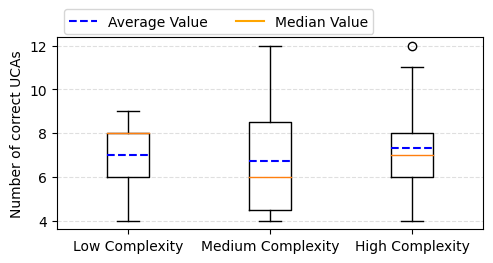

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Group1 Group2  -0.2632 0.9668 -2.8306 2.3042  False
Group1 Group3   0.3333 0.9431 -2.1341 2.8007  False
Group2 Group3   0.5965 0.6043 -0.9012 2.0941  False
---------------------------------------------------


In [28]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Generate three sample datasets with different sizes (replace these with your own data)
group1 = np.array([9, 6, 8, 8, 4])
group2 = np.array([5, 5, 12, 6, 6, 12, 8, 7, 4, 9, 8, 4, 4, 7, 5, 9, 4, 9, 4])
group3 = np.array([6, 7, 11, 8, 6, 8, 5, 5, 5, 8, 8, 9, 5, 8, 9, 7, 8, 4, 8, 7, 7, 9, 7, 6, 9, 7, 8, 12, 6, 7])

# Perform a one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# Print the results
print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Determine the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between at least one pair of groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

# Additional information about the groups
print("\nGroup 1 (Sample Size:", len(group1), "):", group1)
print("Group 2 (Sample Size:", len(group2), "):", group2)
print("Group 3 (Sample Size:", len(group3), "):", group3)


group1_mean = np.mean(group1)
group2_mean = np.mean(group2)
group3_mean = np.mean(group3)
print("\nGroup 1 (Group1_mean:", group1_mean, ")")
print("\nGroup 2 (Group2_mean:", group2_mean, ")")
print("\nGroup 3 (Group3_mean:", group3_mean, ")")

means = [group1_mean, group2_mean, group3_mean]
min_mean = min(means)
max_mean = max(means)

diff = max_mean - min_mean
print("\nGroup (Group_mean_diff:", diff, ")")

plt.figure(figsize=(5.5, 2.5))
plt.boxplot([group1, group2, group3], labels=['Low Complexity','Medium Complexity','High Complexity'])
plt.ylabel('Number of correct UCAs')
plt.grid(axis='y', linestyle='--', which='major', color='grey', alpha=.25)

line_width = 0.15  # Adjust the line width to your preference
plt.hlines(group1_mean, xmin=1-line_width, xmax=1+line_width, colors='blue', linestyles='dashed')
plt.hlines(group2_mean, xmin=2-line_width, xmax=2+line_width, colors='blue', linestyles='dashed')
plt.hlines(group3_mean, xmin=3-line_width, xmax=3+line_width, colors='blue', linestyles='dashed')

blue_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label='Average Value')
orange_line = mlines.Line2D([], [], color='orange', linestyle='-', label='Median Value')
plt.legend(ncol=2, handles=[blue_line, orange_line], loc='upper left', bbox_to_anchor=(0,1.18))

plt.show()

data = np.concatenate([group1, group2, group3])
labels = ['Group1'] * len(group1) + ['Group2'] * len(group2) + ['Group3'] * len(group3)

# Perform pairwise comparison
tukey_results = pairwise_tukeyhsd(data, labels, alpha=alpha)

# Print the results table
print(tukey_results)

t-statistic: -1.7078634637435184
p-value: 0.09604048835040342
Fail to reject the null hypothesis: There is no significant difference between the groups.

Group 1 (Group1_mean: 0.8935154027259289 )

Group 2 (Group2_mean: 0.9260254803675855 )

Group (Group_mean_diff: 0.03251007764165659 )


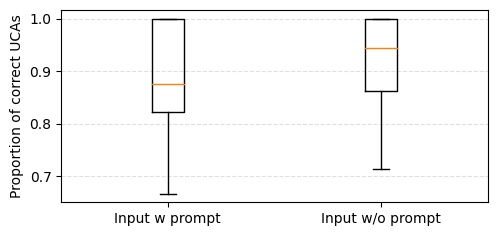

\begin{tabular}{llrrrrr}
\toprule
 group1   & group2   &   meandiff &     p-adj &       lower &     upper &   reject \\
\midrule
 Group 1  & Group 2  &  0.0325101 & 0.0960405 & -0.00541903 & 0.0704392 &        0 \\
\bottomrule
\end{tabular}


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Generate two sample datasets (replace these with your own data)
group1 = np.array([5/5, 7/7, 8/8, 4/4, 7/8, 4/6, 8/10, 8/8, 8/8, 9/10, 8/10, 9/9, 4/4, 9/11, 7/9, 5/7, 7/8, 6/6, 6/7, 6/7, 7/8, 8/9, 7/8, 8/10, 7/7, 7/9, 6/6, 8/10, 11/13, 10/10, 7/8, 6/7, 11/11, 7/7, 5/6, 8/10, 7/8, 10/11])

group2 = np.array([6/6, 13/14, 7/7, 9/9, 5/7, 7/9, 7/7, 9/10, 12/14, 10/12, 8/9, 10/10, 6/6, 8/9, 8/8, 8/8, 8/10, 5/6, 7/7, 9/9, 8/9, 12/12, 7/7, 7/7, 6/6, 10/10, 8/8, 13/14, 7/7, 9/10, 14/14, 6/7, 24/25, 7/8, 9/10, 4/5, 4/5, 6/7])

# Perform an independent two-sample t-test

t_statistic, p_value = stats.ttest_rel(group1, group2)

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Determine the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")


group1_mean = np.mean(group1)
group2_mean = np.mean(group2)
print("\nGroup 1 (Group1_mean:", group1_mean, ")")
print("\nGroup 2 (Group2_mean:", group2_mean, ")")

means = [group1_mean, group2_mean]
min_mean = min(means)
max_mean = max(means)

diff = max_mean - min_mean
print("\nGroup (Group_mean_diff:", diff, ")")


# Box plot to show distributions
plt.figure(figsize=(5.5, 2.5))
plt.boxplot([group1, group2], labels=['Input w prompt', 'Input w/o prompt'])
plt.ylabel('Proportion of correct UCAs')
plt.grid(axis='y', linestyle='--', which='major', color='grey', alpha=.25)


plt.show()

from tabulate import tabulate

#Generate LaTeX table
meandiff = group2_mean - group1_mean
# Assuming a 95% confidence interval for the t-test
confidence_level = 0.95
degrees_freedom = len(group1) + len(group2) - 2
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=meandiff, scale=stats.sem(group1-group2))
lower, upper = confidence_interval
reject = p_value < alpha

# Generate LaTeX table
headers = ["group1", "group2", "meandiff", "p-adj", "lower", "upper", "reject"]
table_data = [
    ["Group 1", "Group 2", meandiff, p_value, lower, upper, reject]
]

latex_table = tabulate(table_data, headers=headers, tablefmt="latex_booktabs")
print(latex_table)

t-statistic: -1.979759651033951
p-value: 0.05144982133190643
Fail to reject the null hypothesis: There is no significant difference between the groups.

Group 1 (Group1_mean: 7.2368421052631575 )

Group 2 (Group2_mean: 8.5 )

Group (Group_mean_diff: 1.2631578947368425 )


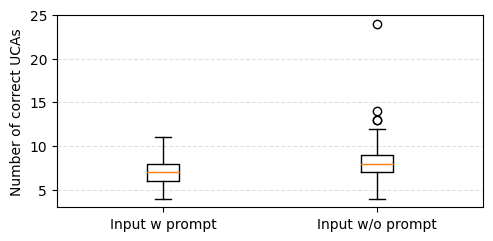

\begin{tabular}{llrrrrr}
\toprule
 group1   & group2   &   meandiff &     p-adj &    lower &   upper &   reject \\
\midrule
 Group 1  & Group 2  &    1.26316 & 0.0514498 & 0.185377 & 2.34094 &        0 \\
\bottomrule
\end{tabular}


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Generate two sample datasets (replace these with your own data)
group1 = np.array([5, 7, 8, 4, 7, 4, 8, 8, 8, 9, 8, 9, 4, 9, 7, 5, 7, 6, 6, 6, 7, 8, 7, 8, 7, 7, 6, 8, 11, 10, 7, 6, 11, 7, 5, 8, 7, 10])
group2 = np.array([6, 13, 7, 9, 5, 7, 7, 9, 12, 10, 8, 10, 6, 8, 8, 8, 8, 5, 7, 9, 8, 12, 7, 7, 6, 10, 8, 13, 7, 9, 14, 6, 24, 7, 9, 4, 4, 6])

# Perform an independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Determine the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")


group1_mean = np.mean(group1)
group2_mean = np.mean(group2)
print("\nGroup 1 (Group1_mean:", group1_mean, ")")
print("\nGroup 2 (Group2_mean:", group2_mean, ")")

means = [group1_mean, group2_mean]
min_mean = min(means)
max_mean = max(means)

diff = max_mean - min_mean
print("\nGroup (Group_mean_diff:", diff, ")")


plt.figure(figsize=(5.5, 2.5))
plt.boxplot([group1, group2], labels=['Input w prompt', 'Input w/o prompt'])
plt.ylabel('Number of correct UCAs')
plt.grid(axis='y', linestyle='--', which='major', color='grey', alpha=.25)


plt.show()


from tabulate import tabulate

#Generate LaTeX table
meandiff = group2_mean - group1_mean
#Assuming a 95% confidence interval for the t-test
confidence_level = 0.95
degrees_freedom = len(group1) + len(group2) - 2
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=meandiff, scale=stats.sem(group1-group2))
lower, upper = confidence_interval
reject = p_value < alpha

#Generate LaTeX table
headers = ["group1", "group2", "meandiff", "p-adj", "lower", "upper", "reject"]
table_data = [
    ["Group 1", "Group 2", meandiff, p_value, lower, upper, reject]
]

latex_table = tabulate(table_data, headers=headers, tablefmt="latex_booktabs")
print(latex_table)

One-way ANOVA Results:
F-statistic: 13.790359204494523
P-value: 4.47630279340019e-06
Reject the null hypothesis: There is a significant difference between at least one pair of groups.

Group 1 (Sample Size: 38 ): [1.         1.         1.         1.         0.875      0.66666667
 0.8        1.         1.         0.9        0.8        1.
 1.         0.81818182 0.77777778 0.71428571 0.875      1.
 0.85714286 0.85714286 0.875      0.88888889 0.875      0.8
 1.         0.77777778 1.         0.8        0.84615385 1.
 0.875      0.85714286 1.         1.         0.83333333 0.8
 0.875      0.90909091]
Group 2 (Sample Size: 38 ): [1.         0.92857143 1.         1.         0.71428571 0.77777778
 1.         0.9        0.85714286 0.83333333 0.88888889 1.
 1.         0.88888889 1.         1.         0.8        0.83333333
 1.         1.         0.88888889 1.         1.         1.
 1.         1.         1.         0.92857143 1.         0.9
 1.         0.85714286 0.96       0.875      0.9        0.8

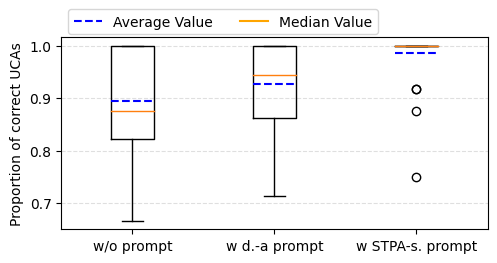

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Group1 Group2   0.0325 0.1662 -0.0098 0.0748  False
Group1 Group3   0.0922    0.0  0.0499 0.1346   True
Group2 Group3   0.0597 0.0031  0.0174  0.102   True
---------------------------------------------------


In [30]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Generate three sample datasets with different sizes (replace these with your own data)
group1 = np.array([5/5, 7/7, 8/8, 4/4, 7/8, 4/6, 8/10, 8/8, 8/8, 9/10, 8/10, 9/9, 4/4, 9/11, 7/9, 5/7, 7/8, 6/6, 6/7, 6/7, 7/8, 8/9, 7/8, 8/10, 7/7, 7/9, 6/6, 8/10, 11/13, 10/10, 7/8, 6/7, 11/11, 7/7, 5/6, 8/10, 7/8, 10/11])
group2 = np.array([6/6, 13/14, 7/7, 9/9, 5/7, 7/9, 7/7, 9/10, 12/14, 10/12, 8/9, 10/10, 6/6, 8/9, 8/8, 8/8, 8/10, 5/6, 7/7, 9/9, 8/9, 12/12, 7/7, 7/7, 6/6, 10/10, 8/8, 13/14, 7/7, 9/10, 14/14, 6/7, 24/25, 7/8, 9/10, 4/5, 4/5, 6/7])
group3 = np.array([6/6, 6/6, 11/12, 6/6, 8/8, 8/8, 4/4, 6/6, 6/8, 8/8, 9/9, 6/6, 5/5, 7/7, 6/6, 5/5, 8/8, 8/8, 5/5, 6/6, 5/5, 7/7, 5/5, 4/4, 5/5, 6/6, 6/6, 7/8, 8/8, 6/6, 8/8, 5/5, 16/16, 5/5, 11/12, 5/5, 12/12, 11/11])

# Perform a one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# Print the results
print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Determine the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between at least one pair of groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

# Additional information about the groups
print("\nGroup 1 (Sample Size:", len(group1), "):", group1)
print("Group 2 (Sample Size:", len(group2), "):", group2)
print("Group 3 (Sample Size:", len(group3), "):", group3)


group1_mean = np.mean(group1)
group2_mean = np.mean(group2)
group3_mean = np.mean(group3)
print("\nGroup 1 (Group1_mean:", group1_mean, ")")
print("\nGroup 2 (Group2_mean:", group2_mean, ")")
print("\nGroup 3 (Group3_mean:", group3_mean, ")")

means = [group1_mean, group2_mean, group3_mean]
min_mean = min(means)
max_mean = max(means)

diff = max_mean - min_mean
print("\nGroup (Group_mean_diff:", diff, ")")


# Create a box plot to show distributions
plt.figure(figsize=(5.5, 2.5))
plt.boxplot([group1, group2, group3], labels=['w/o prompt','w d.-a prompt', 'w STPA-s. prompt'])
plt.ylabel('Proportion of correct UCAs')
plt.grid(axis='y', linestyle='--', which='major', color='grey', alpha=.25)
# plt.xticks(fontsize=9)

line_width = 0.15  # Adjust the line width to your preference
plt.hlines(group1_mean, xmin=1-line_width, xmax=1+line_width, colors='blue', linestyles='dashed')
plt.hlines(group2_mean, xmin=2-line_width, xmax=2+line_width, colors='blue', linestyles='dashed')
plt.hlines(group3_mean, xmin=3-line_width, xmax=3+line_width, colors='blue', linestyles='dashed')
# Add a note
# note = "Note: 'DAgn' refers to 'domain-agnostic', 'STPAS' refers to 'STPA-specific'"
# plt.figtext(0.5, -0.05, note, wrap=True, horizontalalignment='center', fontsize=8)
blue_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label='Average Value')
orange_line = mlines.Line2D([], [], color='orange', linestyle='-', label='Median Value')
plt.legend(ncol=2, handles=[blue_line, orange_line], loc='upper left', bbox_to_anchor=(0,1.18))
plt.show()


data = np.concatenate([group1, group2, group3])
labels = ['Group1'] * len(group1) + ['Group2'] * len(group2) + ['Group3'] * len(group3)

# Perform pairwise comparison
tukey_results = pairwise_tukeyhsd(data, labels, alpha=alpha)

# Print the results table
print(tukey_results)


# data = np.concatenate([group1, group2, group3])
# labels = ['Group1'] * len(group1) + ['Group2'] * len(group2) + ['Group3'] * len(group3)

# # Perform pairwise comparison
# tukey_results = pairwise_tukeyhsd(data, labels, alpha=alpha)

# # Manually print the results with more decimal places
# print("Multiple Comparison of Means - Tukey HSD,FWER=0.05")
# print("group1 group2 meandiff p-adj lower upper reject")
# for res in tukey_results.summary().data[1:]:
#     print(f"{res[0]} {res[1]} {res[2]:.4f} {res[3]:.6f} {res[4]:.4f} {res[5]:.4f} {res[6]}")


One-way ANOVA Results:
F-statistic: 3.4184650705149204
P-value: 0.036249875647539016
Reject the null hypothesis: There is a significant difference between at least one pair of groups.

Group 1 (Sample Size: 38 ): [ 5  7  8  4  7  4  8  8  8  9  8  9  4  9  7  5  7  6  6  6  7  8  7  8
  7  7  6  8 11 10  7  6 11  7  5  8  7 10]
Group 2 (Sample Size: 38 ): [ 6 13  7  9  5  7  7  9 12 10  8 10  6  8  8  8  8  5  7  9  8 12  7  7
  6 10  8 13  7  9 14  6 24  7  9  4  4  6]
Group 3 (Sample Size: 38 ): [ 6  6 11  6  8  8  4  6  6  8  9  6  5  7  6  5  8  8  5  6  5  7  5  4
  5  6  6  7  8  6  8  5 16  5 11  5 12 11]

Group 1 (Group1_mean: 7.2368421052631575 )

Group 2 (Group2_mean: 8.5 )

Group 3 (Group3_mean: 7.0 )

Group (Group_mean_diff: 1.5 )


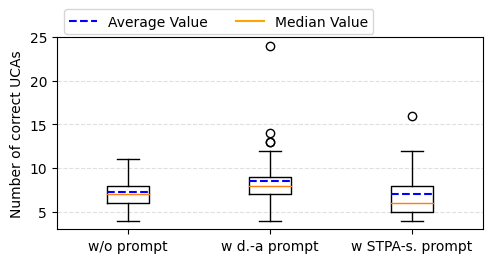

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Group1 Group2   1.2632 0.1057 -0.2021  2.7284  False
Group1 Group3  -0.2368  0.922 -1.7021  1.2284  False
Group2 Group3     -1.5 0.0435 -2.9653 -0.0347   True
----------------------------------------------------


In [32]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Generate three sample datasets with different sizes (replace these with your own data)
group1 = np.array([5, 7, 8, 4, 7, 4, 8, 8, 8, 9, 8, 9, 4, 9, 7, 5, 7, 6, 6, 6, 7, 8, 7, 8, 7, 7, 6, 8, 11, 10, 7, 6, 11, 7, 5, 8, 7, 10])
group2 = np.array([6, 13, 7, 9, 5, 7, 7, 9, 12, 10, 8, 10, 6, 8, 8, 8, 8, 5, 7, 9, 8, 12, 7, 7, 6, 10, 8, 13, 7, 9, 14, 6, 24, 7, 9, 4, 4, 6])
group3 = np.array([6, 6, 11, 6, 8, 8, 4, 6, 6, 8, 9, 6, 5, 7, 6, 5, 8, 8, 5, 6, 5, 7, 5, 4, 5, 6, 6, 7, 8, 6, 8, 5, 16, 5, 11, 5, 12, 11])

# Perform a one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# Print the results
print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Determine the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between at least one pair of groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

# Additional information about the groups
print("\nGroup 1 (Sample Size:", len(group1), "):", group1)
print("Group 2 (Sample Size:", len(group2), "):", group2)
print("Group 3 (Sample Size:", len(group3), "):", group3)


group1_mean = np.mean(group1)
group2_mean = np.mean(group2)
group3_mean = np.mean(group3)
print("\nGroup 1 (Group1_mean:", group1_mean, ")")
print("\nGroup 2 (Group2_mean:", group2_mean, ")")
print("\nGroup 3 (Group3_mean:", group3_mean, ")")

means = [group1_mean, group2_mean, group3_mean]
min_mean = min(means)
max_mean = max(means)

diff = max_mean - min_mean
print("\nGroup (Group_mean_diff:", diff, ")")

plt.figure(figsize=(5.5, 2.5))
plt.boxplot([group1, group2, group3], labels=['w/o prompt','w d.-a prompt', 'w STPA-s. prompt'])
plt.ylabel('Number of correct UCAs')
plt.grid(axis='y', linestyle='--', which='major', color='grey', alpha=.25)
# plt.xticks(fontsize=9)

line_width = 0.15  # Adjust the line width to your preference
plt.hlines(group1_mean, xmin=1-line_width, xmax=1+line_width, colors='blue', linestyles='dashed')
plt.hlines(group2_mean, xmin=2-line_width, xmax=2+line_width, colors='blue', linestyles='dashed')
plt.hlines(group3_mean, xmin=3-line_width, xmax=3+line_width, colors='blue', linestyles='dashed')
# Add a note
# note = "Note: 'DAgn' refers to 'domain-agnostic', 'STPAS' refers to 'STPA-specific'"
# plt.figtext(0.5, -0.05, note, wrap=True, horizontalalignment='center', fontsize=8)
blue_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label='Average Value')
orange_line = mlines.Line2D([], [], color='orange', linestyle='-', label='Median Value')
plt.legend(ncol=2, handles=[blue_line, orange_line], loc='upper left', bbox_to_anchor=(0,1.18))
plt.show()

data = np.concatenate([group1, group2, group3])
labels = ['Group1'] * len(group1) + ['Group2'] * len(group2) + ['Group3'] * len(group3)

# Perform pairwise comparison
tukey_results = pairwise_tukeyhsd(data, labels, alpha=alpha)

# Print the results table
print(tukey_results)